# Task 5: Introduction to Computer Vision with OpenCV

## Section 1: Setup & Dataset

### **Task 1**: Load and Display an Image
*Instruction*: Using OpenCV, read an image (`sample.jpg`) and display it using both OpenCV and Matplotlib.

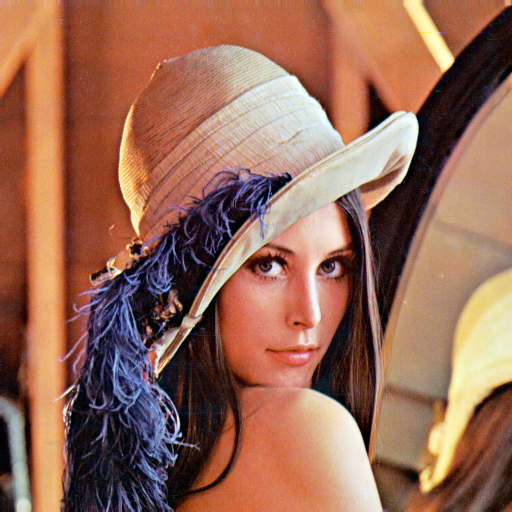

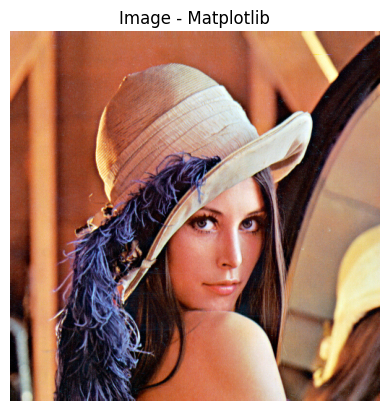

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

# Load the image using OpenCV
image = cv2.imread('sample.jpg')

# Display using OpenCV's alternative for Colab
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow

# Continue with the rest of your code...
# Convert BGR (OpenCV default) to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display using Matplotlib
plt.imshow(image_rgb)
plt.title('Image - Matplotlib')
plt.axis('off')
plt.show()

## Section 2: Image Properties and Resizing

### **Task 2**: Print Image Properties and Resize

*Instruction*: Print the shape (height, width, channels) of the image. Resize it to 100x100 pixels.


Original Image Shape: Height=512, Width=512, Channels=3
Resized Image Shape: Height=100, Width=100, Channels=3


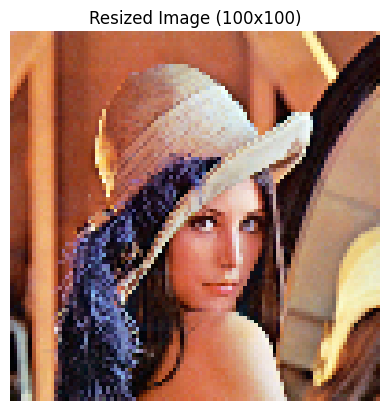

In [ ]:
# Print image properties
height, width, channels = image.shape
print(f"Original Image Shape: Height={height}, Width={width}, Channels={channels}")

# Resize the image to 100x100
resized_image = cv2.resize(image, (100, 100))

# Print new shape
new_height, new_width, new_channels = resized_image.shape
print(f"Resized Image Shape: Height={new_height}, Width={new_width}, Channels={new_channels}")

# (Optional) Display the resized image using Matplotlib
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
plt.imshow(resized_image_rgb)
plt.title('Resized Image (100x100)')
plt.axis('off')
plt.show()

## Section 3: Cropping and Rotation

### **Task 3**: Crop and Rotate the Image

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Crop the center square of the image
*   Rotate the image by 45 degrees using `cv2.getRotationMatrix2D`


Original size: 512x512
Cropped size: (512, 512, 3)


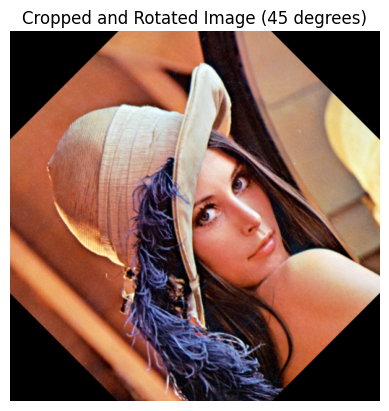

In [ ]:
# Get the original dimensions
h, w, c = image.shape
print(f"Original size: {h}x{w}")

# Crop the center square
min_dim = min(h, w)
start_x = (w - min_dim) // 2
start_y = (h - min_dim) // 2
cropped_image = image[start_y:start_y + min_dim, start_x:start_x + min_dim]

print(f"Cropped size: {cropped_image.shape}")

# Rotate the cropped image by 45 degrees
center = (min_dim // 2, min_dim // 2)
angle = 45
scale = 1.0

# Get the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Perform the rotation
rotated_image = cv2.warpAffine(cropped_image, rotation_matrix, (min_dim, min_dim))

# Convert to RGB for Matplotlib
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

# Display the rotated image
plt.imshow(rotated_image_rgb)
plt.title('Cropped and Rotated Image (45 degrees)')
plt.axis('off')
plt.show()

## Section 4: Drawing & Annotation

### **Task 4**: Draw Shapes and Text on an Image

*Instruction*: Draw a rectangle, circle, line, and add text on the image.

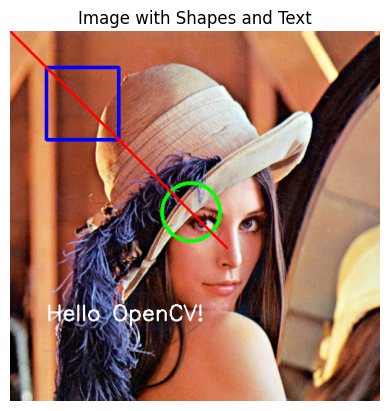

In [ ]:
# Make a copy of the original image to draw on
drawing_image = image.copy()

# Draw a rectangle (top-left corner at (50,50), bottom-right at (150,150))
cv2.rectangle(drawing_image, (50, 50), (150, 150), color=(255, 0, 0), thickness=3)

# Draw a circle (center at (250,250), radius 40)
cv2.circle(drawing_image, (250, 250), 40, color=(0, 255, 0), thickness=3)

# Draw a line (from (0,0) to (300,300))
cv2.line(drawing_image, (0, 0), (300, 300), color=(0, 0, 255), thickness=2)

# Add text (at position (50,400))
cv2.putText(drawing_image, 'Hello OpenCV!', (50, 400),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.0,
            color=(255, 255, 255),
            thickness=2)

# Convert BGR to RGB for matplotlib display
drawing_image_rgb = cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(drawing_image_rgb)
plt.title('Image with Shapes and Text')
plt.axis('off')
plt.show()

## Section 5: Filters and Edge Detection

### **Task 5**:  Apply Blur and Canny Edge Detection

*Instruction*: Apply Gaussian blur and detect edges using the Canny algorithm.


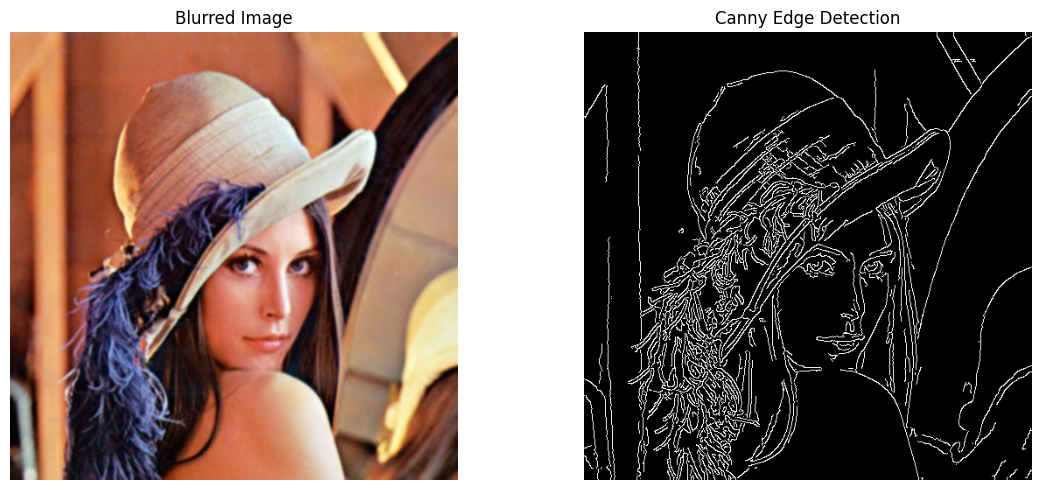

In [ ]:
# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # (5,5) kernel size, 0 = auto sigma

# Apply Canny Edge Detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Display the blurred image
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
blurred_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)
plt.imshow(blurred_rgb)
plt.title('Blurred Image')
plt.axis('off')

# Display the edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()








## Section 6: Color Spaces and Histogram

### **Task 6**: Convert Color Spaces and Plot Histogram

*Instruction*: Convert the image to grayscale and HSV. Then plot a histogram of grayscale values.

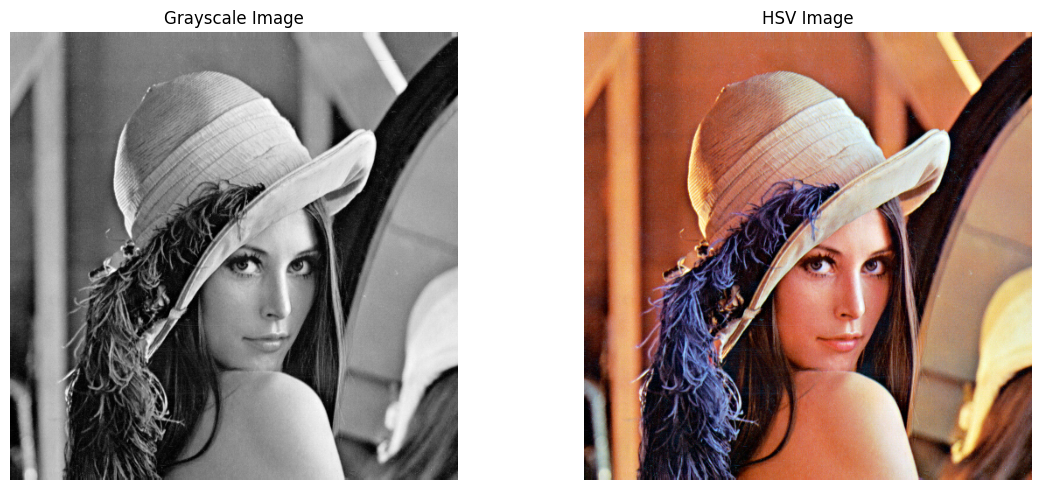

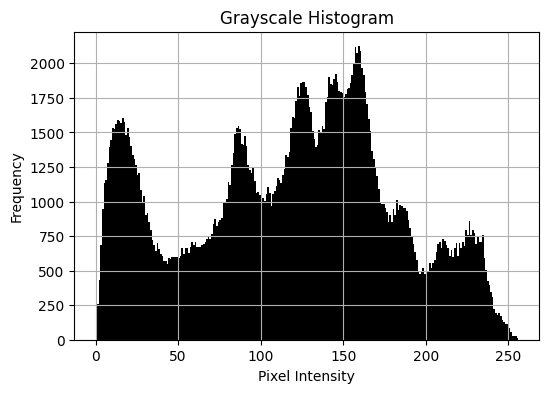

In [ ]:
# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display Grayscale and HSV images (optional)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
hsv_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)  # Convert for proper Matplotlib display
plt.imshow(hsv_rgb)
plt.title('HSV Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot histogram of grayscale values
plt.figure(figsize=(6, 4))
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()